<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd
import random
import math

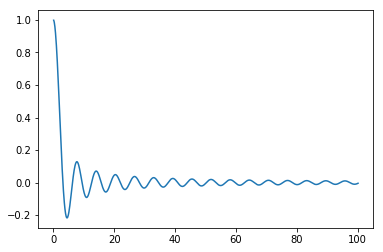

In [19]:
def sinc(x):
    return math.sin(x)/x

x=np.linspace(0.1,100.1,1000)
y=[]
for i in x:
    y.append(sinc(i))
plt.plot(x,y)

In [20]:
H_0 = 1.0 #波高  --夏天1.3  冬天0.7
h_0 = 5 #海洋深度
g = 9.7863 #重力加速度 —— 按照海口来的
c_0 = math.sqrt(g*(h_0+H_0)) #波速

distance_10 = 3000 #3.0km --- 10m
distance_5 = 860 # 800m --- 5m
ocean_k = h_0/distance_5 

beach_width = 60 #单位m
beach_height = 2.4 #单位m
#beach_angle = 5*math.pi/180
beach_k = beach_height/beach_width

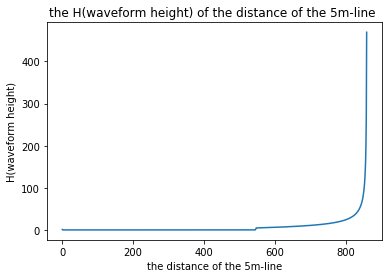

In [21]:
h_x = [h_0 - i*ocean_k for i in range(distance_5)]
H_x = [1.0]

def H_near(h_i,H_j):
    n_i0= 0.55+0.3*(h_0-h_i)/ocean_k/distance_5
    c_i = math.sqrt(g*(h_i+H_j))
    k_s = h_0/h_i*math.pow(c_0/c_i*n_i0,3)
    return k_s*H_j

for i in range(len(h_x)):
    if i > 0:
        a=H_near(h_x[i],H_x[i-1])
        H_x.append(a)

plt.plot(H_x)
plt.title('the H(waveform height) of the distance of the 5m-line ')
plt.ylabel('H(waveform height)')
plt.xlabel('the distance of the 5m-line')
#plt.xlim(0,860)
#plt.ylim(0,20)
plt.savefig('the H(waveform height) .png')

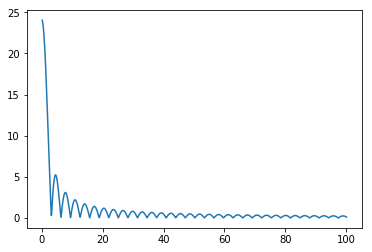

In [22]:
def sinc_2(x,H):
    res=H*math.sin(x)/x
    return abs(res)
x=np.linspace(0.1,100.1,1000)
y=[]
for i in x:
    y.append(sinc_2(i,H_x[800]))
plt.plot(x,y)

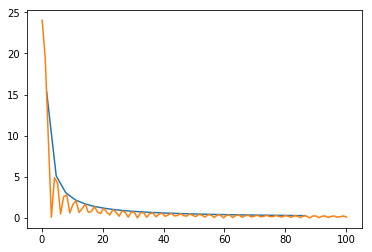

In [23]:
from scipy.interpolate import spline
def sinc_2(x,H):
    res=H*math.sin(x)/x
    return abs(res)
x1 = [np.pi/2 + i*np.pi for i in range(0,28)]
x2=np.linspace(0.1,100.1,100)
y1=[]
y2=[]
for i in x1:
    y1.append(sinc_2(i,H_x[800]))
for i in x2:
    y2.append(sinc_2(i,H_x[800]))
#f_smooth = spline(x1, y1, x2)
plt.plot(x1,y1)
plt.plot(x2,y2)

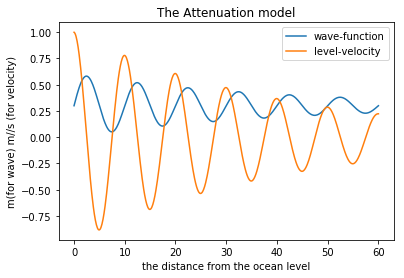

In [24]:
def wave_fun(x,t):
    T=10
    H=0.6
    c=1
    fall=40
    w=(x+c*t)/(T*c)*2*np.pi
    
    pos = H/2*np.sin(w)*np.exp(-x/fall)+H/2
    v_level = c*np.cos(w)*np.exp(-x/fall)
    v_vertical = c*np.sin(w)*np.exp(-x/fall)
    return pos,v_level,v_vertical

x=np.linspace(0,60,600)
y1=[]
y2=[]
y3=[]
for i in x:
    a,b,c=wave_fun(i,0)
    y1.append(a)
    y2.append(b)
    y3.append(c)
plt.plot(x,y1)
plt.plot(x,y2)
#plt.plot(x,y3)
plt.legend(['wave-function','level-velocity'])
plt.xlabel('the distance from the ocean level')
plt.ylabel('m(for wave) m//s (for velocity)')
plt.title('The Attenuation model')
plt.savefig('The Attenuation model.png')

In [25]:
print(wave_fun(40,0))
print(wave_fun(40.03,0))

(0.2999999999999999, 0.36787944117144233, -3.604179040821791e-16)
(0.302078626486213, 0.3675383311202257, 0.006928754954043362)


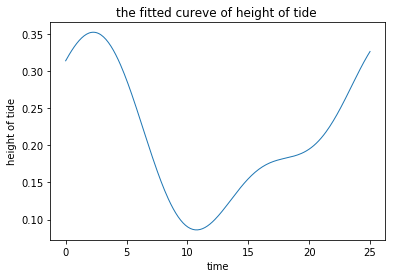

In [26]:
def tide_fun(x):
    a0 = 124.8
    a1 = 64.05
    b1 = 14.88 
    a2 = -0.5196 
    b2 =  27.36 
    w  =  0.2559  
    result = a0 + a1*math.cos(x*w) + b1*math.sin(x*w) + a2*math.cos(2*x*w) + b2*math.sin(2*x*w)
    return result/600

x = np.linspace(0,25,250)
res1=[]

for i in x:
    res1.append(tide_fun(i))
plt.plot(x,res1,linewidth = 1.0)
plt.xlabel('time')
plt.ylabel('height of tide')
plt.title('the fitted cureve of height of tide ')
plt.savefig('the fitted cureve of height of tide.png')
plt.show()

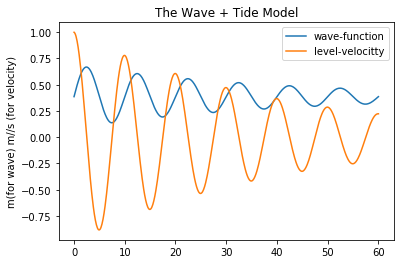

In [27]:
def wave_tide_fun(T,x,t):
    tide = tide_fun(T)
    wave,v_level,v_vertical = wave_fun(x,t)
    w_t = tide + wave
    return w_t,v_level,v_vertical


x=np.linspace(0,60,600)
y1=[]
y2=[]
y3=[]
for i in x:
    a,b,c=wave_tide_fun(11,i,0)
    y1.append(a)
    y2.append(b)
    y3.append(c)
plt.plot(x,y1)
plt.plot(x,y2)
#plt.plot(x,y3)
plt.legend(['wave-function','level-velocitty'])
plt.ylabel('m(for wave) m//s (for velocity)')
plt.title('The Wave + Tide Model')
plt.savefig('The Wave + Tide Model.png')

0.38644788921491857 0.36787944117144233
0.4862910621918655 0.10813671144866399


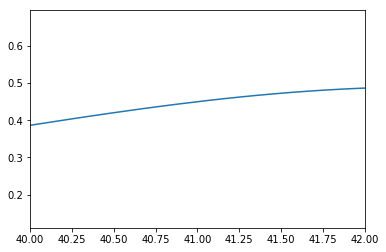

In [28]:
plt.plot(x,y1)
plt.xlim(40,42)
a,b,c=wave_tide_fun(11,40,0)
h_min = a
v_max = b
print(a,b)
a,b,c=wave_tide_fun(11,42,0)
h_max = a 
v_min = b
print(a,b)

h_ave = h_max - h_min
v_ave = v_max - v_min
v_d1 = v_ave/2
v_d2 = v_ave/2

def v_level2depth(v):
    a,b,c=wave_tide_fun(11,40,0)
    v_max = b
    a,b,c=wave_tide_fun(11,42,0)
    v_min = b
    v_ave = v_max - v_min
    v_d1 = v_ave/2
    v_d2 = v_ave/2
    n_d1 = math.floor((v-v_min)/v_d1)+1
    n_d2 = math.floor((v-v_min)/v_d2)+1
    return int(n_d1),int(n_d2)

In [29]:
SIZE = 100        #基本尺寸
Time_T = 5        #一天中的时间，小时
Time_t = 0        #时间维度,秒
Time_hit =  5    #海浪冲刷一次的时间,秒
Time_fall = 5     #退潮后下落一次时间，秒
Time_cell = 10     #元胞自动机1秒迭代次数


#沙子属性
sand_r = 0.002 #沙子半径2mm
sand_p = 2.65*1000 #沙子的密度
sand_n0 = 10 #粘性系数
snad_v0 = 0.2 #泊松比
sand_m0 = 0.4 #摩擦系数
water_v = 6 #离开速度

#元胞属性
cell_d = sand_r*2*5 #每个元胞有5x5x5的沙子组成 2.0 m
cell_mass = math.pow(cell_d,3)*sand_p #元胞质量

#沙堡距离海平面的距离范围
d_near = 40 
d_far  = 40+SIZE*cell_d

In [30]:
#对数正态分布
def p_fun(x):
    #可调参数
    p_u=0.3
    p_a=0.6
    a=1/(math.sqrt(2*np.pi)*p_a*x)
    c=-0.5*math.pow(math.log(x)-p_u,2)/math.pow(p_a,2)
    b=np.exp(c)
    res = a*b
    return res
#抵抗力
def F_fun(x,n):
    sand_m = sand_m0 * np.exp(-x)
    sand_n = sand_n0 * p_fun(x)
    F_f=sand_m*cell_mass*g*n
    F_a=np.pi*6*sand_n*sand_r
    F_s=snad_v0/(1+snad_v0)/2*cell_mass*g*n
    F = F_f + F_a - F_s
    return F,F_f,F_a

#含水量与下降概率
def P_water(x):
    if x == 0:
        return 0.57
    else:
        a,b,c=F_fun(x,1)
        return (0.35-a)*2

In [67]:
def initial():
    to_be = np.zeros((SIZE, SIZE))
    hum = np.zeros((SIZE, SIZE))
    H_initial = [i for i in range(SIZE)]
    for i in range(SIZE):
        for j in range(SIZE):
            if i < H_initial[j]:
                to_be[i,j] = 1
                hum[i,j]=1
            else:
                to_be[i,j] = 0
    return to_be,hum

#绘制当前沙堆形状
def draw(pos):
    x=[]
    y=[]
    for i in range(SIZE):
        for j in range(SIZE):
            if pos[i][j] == 1 :
                x.append(j)
                y.append(i)
    fig, axScatter = plt.subplots(figsize=(6,6))
    # the scatter plot:
    axScatter.scatter(x, y)
    axScatter.set_aspect(1.)
    plt.axis([0,100,0,100])
    plt.show()

In [32]:
#计算高度函数
def len_cal(image):
    cliff_len=[]
    for j in range(SIZE): #这里的i对应横坐标
        term = 0 
        for i in range(SIZE): #这里的j对应纵坐标
            if image[i,j] == 1 :
                term = i+1
        cliff_len.append(term)
    return cliff_len

#计算差值函数
def cliff_difference(cliff_len):
    #计算差值
    cliff_dif=[]
    for i in range(SIZE): #这里的i对应横坐标
        if i == 0:
            cliff_dif.append(cliff_len[i])
        else:
            cliff_dif.append(cliff_len[i] - cliff_len[i-1])
    return cliff_dif

#通过差值还原pos函数
def len2pos(cliff_len):
    image=np.zeros((SIZE,SIZE))
    for i in range(SIZE):
        for j in range(SIZE):
            if cliff_len[j] > i:
                image[i,j] = 1
            else:
                image[i,j] = 0
    return image
            

In [33]:
#海浪冲击函数
def wave_hit(image,hum,T=11,t=0):
    #print(type(image))
    for i in range(SIZE):
        #获取高度i行边缘列j
        term = 0
        for j in range(SIZE):
            #print(i,j)
            if image[i,j] == 1 :
                term = j
                break
        x = d_near + term*cell_d
        #评估边缘列的影响
        w_t,v_l,v_v=wave_tide_fun(T,x,t)
        #根据海浪的结果，得到
        if i*cell_d <= w_t :
            depth,num = v_level2depth(v_l)
            for k in range(depth):
                if term + k < SIZE-1 :
                    hum[i,term+k+num] =  hum[i,term+k] + 0.25 #增加湿度
            for k in range(num):
                if term + k < SIZE -1 :
                    image[i,term+k] = 0 #冲刷带走
    return image,hum
                    
#定义沙堆下坠规则
#高度差 的 权重 50%
#如果 S(x)-S(x-1) = 2 ,有 20%的几率下坠
#如果 S(x)-S(x-1) = i ,i>2 下坠概率 p1 = 20% + (i-2)*20%
#进一步考虑粘附力的影响，断崖处接触面上下
#粘附力 的 权重 50% 
# p2 = hum-1
# p = (p1+p2)/2

#下坠函数
def fall_fun(cliff_len,hum):
    for times in range(Time_cell): #计算5次
        cliff_dif = cliff_difference(cliff_len)
        for i in range(SIZE): #这里的i对应横坐标
            p,p1,p2=0,0,0
            p2 = (hum[cliff_len[i]-cliff_dif[i],i]+hum[cliff_len[i]-1-cliff_dif[i],i]+hum[cliff_len[i]+1-cliff_dif[i],i])/3
            p2=P_water(p2)
            if(cliff_dif[i] >= 2):
                p1=0.2+(cliff_dif[i]-2)*0.2
            p = (p1+p2)/2
            if p >= random.randint(0,100)/100:
                cliff_len[i] = cliff_len[i] -  math.ceil(cliff_dif[i]/2)#该位置减小差值的一半并向上取整
                cliff_len[i-1] = cliff_len[i-1] + (cliff_dif[i]-math.ceil(cliff_dif[i]/2))
    return cliff_len

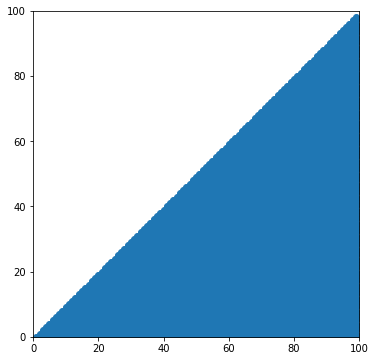

In [34]:
image,hum=initial()
draw(image)

<IPython.core.display.Javascript object>


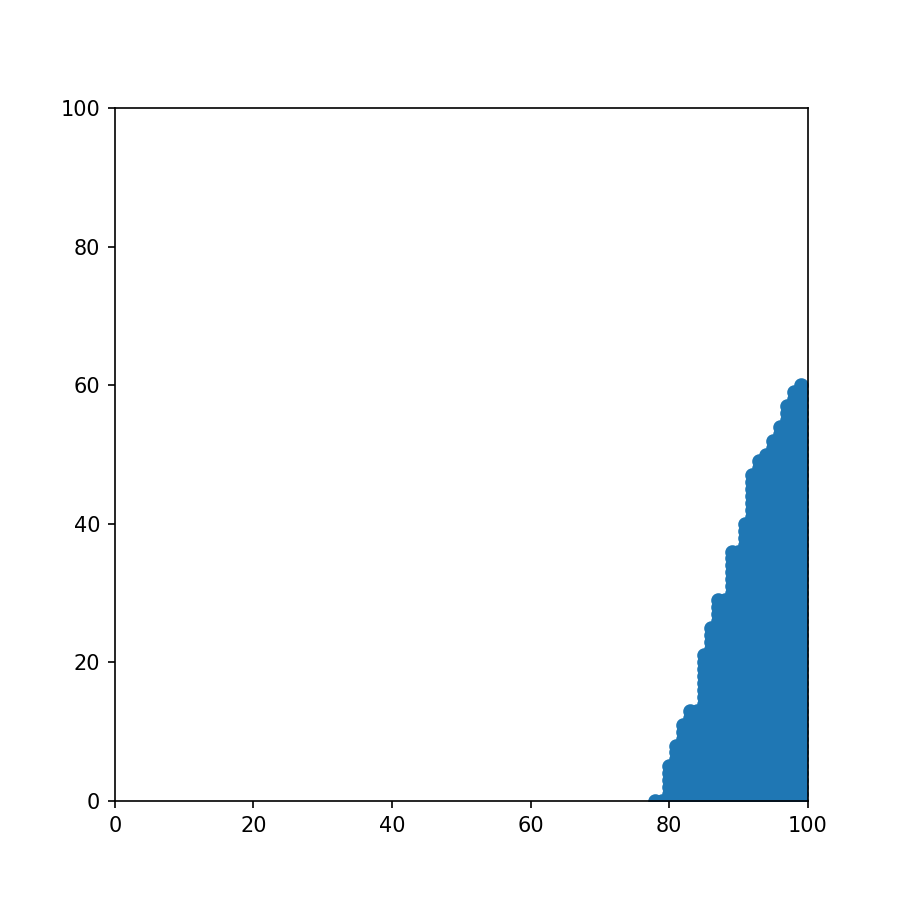

In [68]:
image,hum=initial()
WAVE_TIMES = 50
image_animation = [image,]
for i in range(WAVE_TIMES):
    image,hum=wave_hit(image,hum)
    image_animation.append(image)
    cliff_len=len_cal(image)
    cliff_len=fall_fun(cliff_len,hum)
    image=len2pos(cliff_len)
    image_animation.append(image)
draw(image)

In [41]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation




In [62]:
#绘制当前沙堆形状
def draw2(pos):
    x=[]
    y=[]
    for i in range(SIZE):
        for j in range(SIZE):
            if pos[i][j] == 1 :
                x.append(j)
                y.append(i)
    # the scatter plot:
    #plt.cla()
    #plt.axis([0,100,0,100])
    axScatter.scatter(x, y)
    axScatter.set_aspect(1.)
    return axScatter
    
def update_points(num):
    return draw2(image_animation[num])

In [70]:
#绘制当前沙堆形状
def draw3(pos):
    x=[]
    y=[]
    for i in range(SIZE):
        for j in range(SIZE):
            if pos[i][j] == 1 :
                x.append(j)
                y.append(i)
    # the scatter plot:
    plt.cla()
    plt.axis([0,100,0,100])
    axScatter.scatter(x, y)
    axScatter.set_aspect(1.)
    return axScatter
    
def update_points(num):
    return draw3(image_animation[num])

<IPython.core.display.Javascript object>


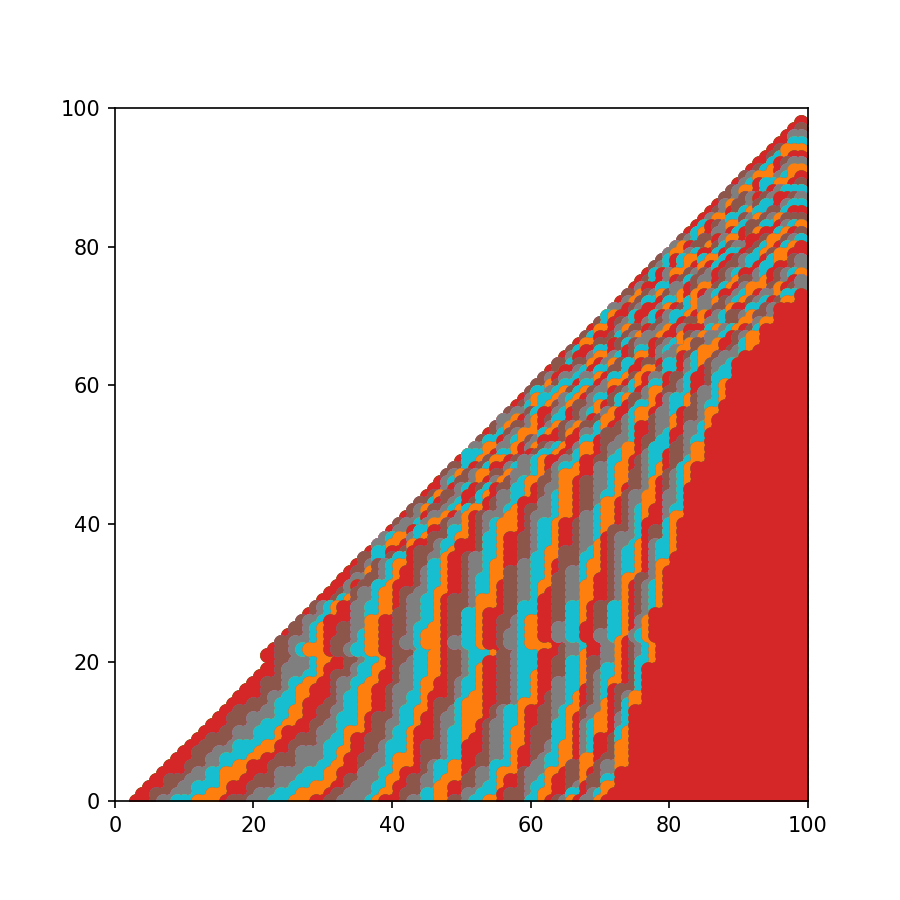

MovieWriter ffmpeg unavailable.


In [69]:
fig,axScatter = plt.subplots(figsize=(6,6))
plt.axis([0,100,0,100])
# 开始制作动画
ani = animation.FuncAnimation(fig, update_points)#, np.arange(0, 100), interval=100, blit=True
plt.show()
ani.save('SandCastle_2d_1_50.gif')

<IPython.core.display.Javascript object>


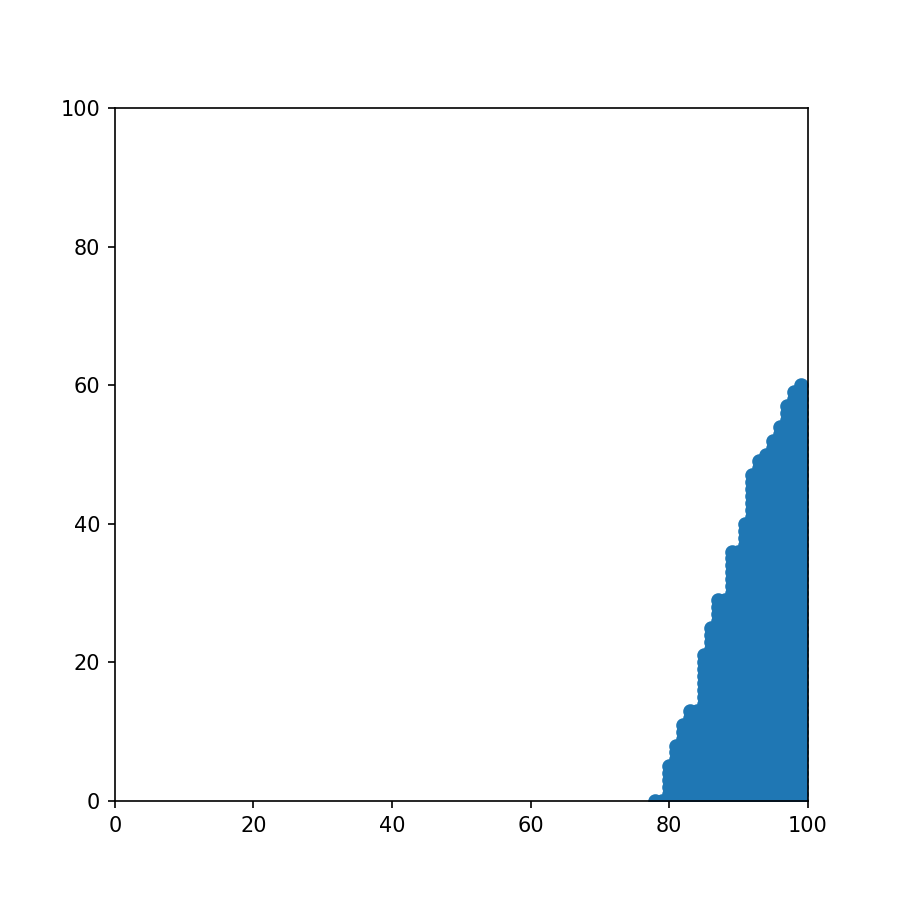

MovieWriter ffmpeg unavailable.


In [71]:
fig,axScatter = plt.subplots(figsize=(6,6))
plt.axis([0,100,0,100])
# 开始制作动画
ani = animation.FuncAnimation(fig, update_points)#, np.arange(0, 100), interval=100, blit=True
plt.show()
ani.save('SandCastle_2d_2_50.gif')